In [0]:
import pandas as pd
import numpy as np

Setting up Panda and understanding the Data

In [0]:
import pandas as pd

df = pd.read_csv("/dbfs/FileStore/shared_uploads/sanjoy@thrivetogether.in/complex_sales_data.csv")
df.head()

,TransactionID,Date,ProductID,ProductName,Quantity,UnitPrice,TotalSale,CustomerID,CustomerAge,CustomerGender,Region,City,SalesChannel,OrderPriority,Returns,ReturnReason,DeliveryTimeDays,DiscountRate,DiscountAmount,PaymentMethod,ProductCategory,ProductWeight,ShippingCost,WarehouseLocation,OrderStatus,FeedbackScore,ReviewComments
0,1,2023-07-20,3,Product C,18,84.05,1512.90,CUST194,54,Other,East,City C,Offline,High,0,NaN,13,0.06,5.0430,Credit Card,Sports,1.04,8.15,Location A,Delivered,1,Poor quality
1,2,2023-11-08,15,Product R,11,70.07,770.77,CUST068,59,Female,South,City A,Online,High,0,NaN,1,0.24,16.8168,Bank Transfer,Electronics,2.63,6.18,Location B,Delivered,1,Excellent
2,3,2023-05-07,14,Product J,2,22.52,45.04,CUST161,34,Other,West,City C,Online,High,1,NaN,8,0.07,1.5764,PayPal,Home & Kitchen,4.55,8.82,Location B,Pending,4,Excellent
3,4,2023-10-19,11,Product G,18,41.43,745.74,CUST127,54,Other,North,City D,Offline,Low,0,NaN,10,0.16,6.6288,PayPal,Sports,4.04,7.16,Location C,Pending,5,Satisfied
4,5,2023-07-11,15,Product Q,7,94.52,661.64,CUST164,65,Other,West,City B,Offline,Low,1,NaN,3,0.29,27.4108,Bank Transfer,Home & Kitchen,0.42,12.67,Location B,Cancelled,5,Excellent


In [0]:
df.shape

(500, 27)

In [0]:
# Generate summary statistics for numeric columns
print(df.describe())

# For a specific column like 'UnitPrice'
print(df['UnitPrice'].describe())


       TransactionID   ProductID  ...  ShippingCost  FeedbackScore
count     500.000000  500.000000  ...    500.000000     500.000000
mean      250.500000   10.256000  ...      9.305640       3.080000
std       144.481833    5.813265  ...      3.737003       1.459404
min         1.000000    1.000000  ...      3.000000       1.000000
25%       125.750000    5.000000  ...      6.062500       2.000000
50%       250.500000   10.000000  ...      9.240000       3.000000
75%       375.250000   15.000000  ...     12.472500       4.000000
max       500.000000   20.000000  ...     15.950000       5.000000

[8 rows x 13 columns]
count    500.000000
mean      56.418020
std       25.753599
min       11.130000
25%       34.245000
50%       57.305000
75%       78.872500
max      100.840000
Name: UnitPrice, dtype: float64


Data Cleaning Problem

In [0]:
# Identifying missing values in each column
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print(f"Missing Values Count:\n{missing_values}\n")
print(f"Missing Values Percentage:\n{missing_percentage}")


Missing Values Count:
TransactionID          0
Date                   0
ProductID              0
ProductName            0
Quantity               0
UnitPrice              0
TotalSale              0
CustomerID             0
CustomerAge            0
CustomerGender         0
Region                 0
City                   0
SalesChannel           0
OrderPriority          0
Returns                0
ReturnReason         444
DeliveryTimeDays       0
DiscountRate           0
DiscountAmount         0
PaymentMethod          0
ProductCategory        0
ProductWeight          0
ShippingCost           0
WarehouseLocation      0
OrderStatus            0
FeedbackScore          0
ReviewComments        42
dtype: int64

Missing Values Percentage:
TransactionID         0.0
Date                  0.0
ProductID             0.0
ProductName           0.0
Quantity              0.0
UnitPrice             0.0
TotalSale             0.0
CustomerID            0.0
CustomerAge           0.0
CustomerGender        0.0
Re

In [0]:
# Removing duplicates based on 'TransactionID' and 'Date'
df.drop_duplicates(subset=['TransactionID', 'Date'], inplace=True)
df.shape



(500, 27)

In [0]:
# Converting 'CustomerGender' to lowercase for consistency
df['CustomerGender'] = df['CustomerGender'].str.lower()
df["CustomerGender"]


0       other
1      female
2       other
3       other
4       other
        ...  
495      male
496     other
497     other
498      male
499      male
Name: CustomerGender, Length: 500, dtype: object

In [0]:
# Convert 'Date' to datetime and ensure 'CustomerAge' is integer
df['Date'] = pd.to_datetime(df['Date'])
df['CustomerAge'] = df['CustomerAge'].astype(int)
df['CustomerAge']


0      54
1      59
2      34
3      54
4      65
       ..
495    42
496    68
497    53
498    34
499    58
Name: CustomerAge, Length: 500, dtype: int64

In [0]:
# Calculating IQR
Q1 = df['UnitPrice'].quantile(0.25)
Q3 = df['UnitPrice'].quantile(0.75)
IQR = Q3 - Q1

# Defining bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Option 1: Remove outliers
df_no_outliers = df[(df['UnitPrice'] >= lower_bound) & (df['UnitPrice'] <= upper_bound)]

# Option 2: Cap outliers to nearest bound
df['UnitPrice'] = df['UnitPrice'].clip(lower=lower_bound, upper=upper_bound)


In [0]:
# Filling missing 'ReturnReason' for rows with returns
df.loc[df['Returns'] == 1, 'ReturnReason'] = df.loc[df['Returns'] == 1, 'ReturnReason'].fillna('Reason Not Provided')


In [0]:
# Correcting common typos with string methods
df['ProductName'] = df['ProductName'].str.replace('Prodcut', 'Product', regex=False)
df['ProductName'] = df['ProductName'].str.replace('Porduct', 'Product', regex=False)


In [0]:
#Normalize DiscountRate
#Applying Min-Max normalization to bring DiscountRate to a 0-1 scale.
df['DiscountRateNormalized'] = (df['DiscountRate'] - df['DiscountRate'].min()) / (df['DiscountRate'].max() - df['DiscountRate'].min())





In [0]:
# Defining age bins and labels
age_bins = [0, 18, 30, 40, 50, 60, 70, 120]
age_labels = ['<18', '18-30', '30-40', '40-50', '50-60', '60-70', '70+']
df['AgeGroup'] = pd.cut(df['CustomerAge'], bins=age_bins, labels=age_labels)



In [0]:
# Applying one-hot encoding to 'Region' and 'SalesChannel'
df_encoded = pd.get_dummies(df, columns=['Region', 'SalesChannel'])


In [0]:
# Replacing zeros with NaN to handle them as missing values
df[['Quantity', 'UnitPrice']] = df[['Quantity', 'UnitPrice']].replace(0, np.nan)


In [0]:
# Title casing 'ProductName' for consistency
df['ProductName'] = df['ProductName'].str.title()


In [0]:
# Example of using fuzzywuzzy (requires installation)
from fuzzywuzzy import process

# Define a list of correct product names
correct_names = ['Product A', 'Product B', 'Product C']

# Function to correct names
def correct_product_names(row):
    corrected_name = process.extractOne(row['ProductName'], correct_names)[0]
    return corrected_name

# Apply the correction
df['ProductName'] = df.apply(correct_product_names, axis=1)



---------------------------------------------------------------------------
ModuleNotFoundError                       Traceback (most recent call last)
File <command-756048061544871>, line 2
      1 # Example of using fuzzywuzzy (requires installation)
----> 2 from fuzzywuzzy import process
      4 # Define a list of correct product names
      5 correct_names = ['Product A', 'Product B', 'Product C']

ModuleNotFoundError: No module named 'fuzzywuzzy'

Data Expoleration

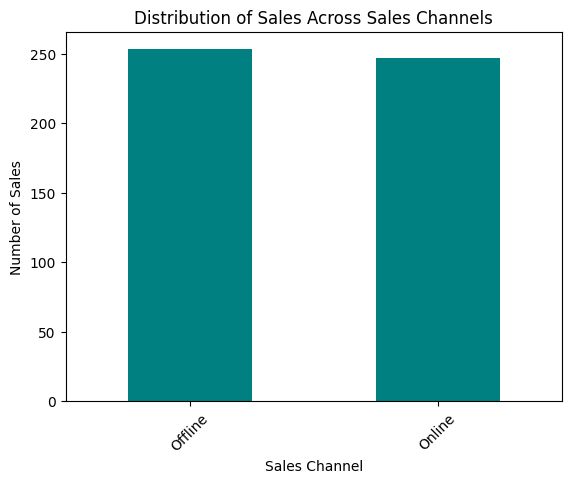

In [0]:
import matplotlib.pyplot as plt

# Count the number of sales per channel
sales_channel_counts = df['SalesChannel'].value_counts()

# Visualize the distribution
sales_channel_counts.plot(kind='bar', color='teal', title='Distribution of Sales Across Sales Channels')
plt.xlabel('Sales Channel')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.show()


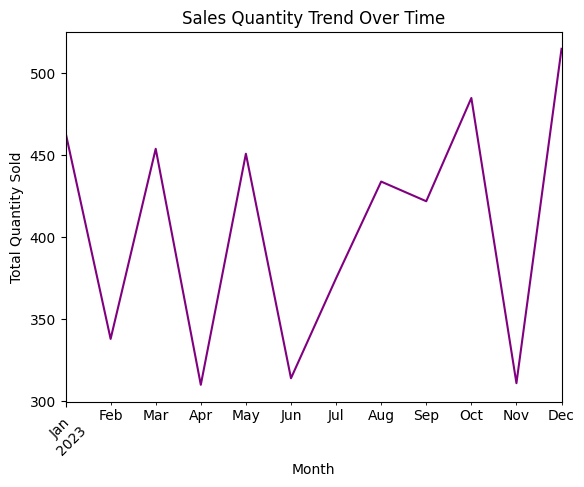

In [0]:
#Sales trends over time
# Ensure 'Date' is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Aggregate sales quantities by date
sales_trends = df.groupby(df['Date'].dt.to_period('M'))['Quantity'].sum()

# Plotting the trend
sales_trends.plot(kind='line', color='purple', title='Sales Quantity Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()


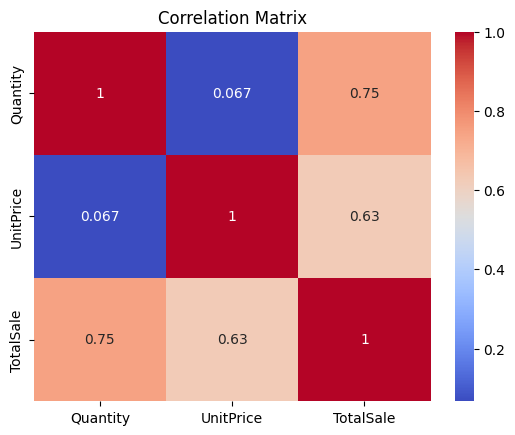

In [0]:
##Corelation analysis
# Selecting relevant columns for correlation analysis
correlation_data = df[['Quantity', 'UnitPrice', 'TotalSale']]

# Calculating correlation matrix
corr_matrix = correlation_data.corr()

# Visualizing the correlation matrix
import seaborn as sns

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Index(['TransactionID', 'Date', 'ProductID', 'ProductName', 'Quantity',
       'UnitPrice', 'TotalSale', 'CustomerID', 'CustomerAge', 'CustomerGender',
       'Region', 'City', 'SalesChannel', 'OrderPriority', 'Returns',
       'ReturnReason', 'DeliveryTimeDays', 'DiscountRate', 'DiscountAmount',
       'PaymentMethod', 'ProductCategory', 'ProductWeight', 'ShippingCost',
       'WarehouseLocation', 'OrderStatus', 'FeedbackScore', 'ReviewComments',
       'DiscountRateNormalized', 'AgeGroup'],
      dtype='object')


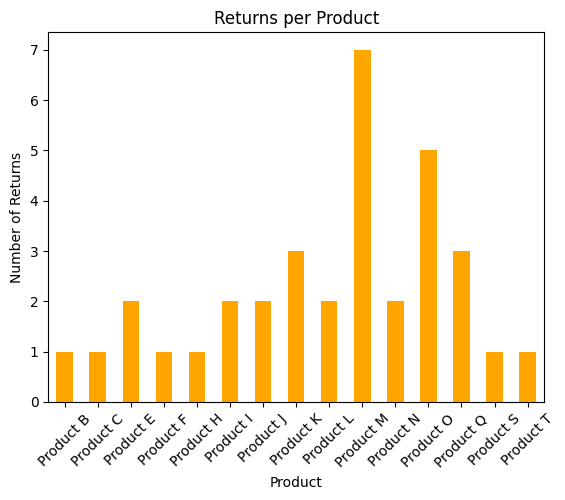

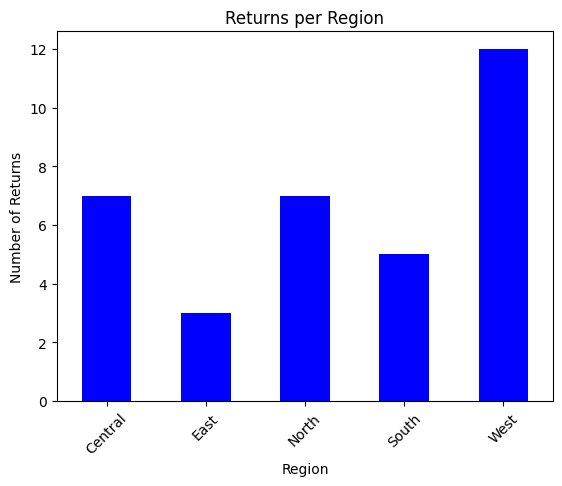

In [0]:
#Return Analysis
print(df.columns)
# Count the number of returns per product
returns_per_product = df[df['Returns'] == 1].groupby('ProductName')['Returns'].count()

# Count the number of returns per region
returns_per_region = df[df['Returns'] == 1].groupby('Region')['Returns'].count()

# Visualizing returns per product
returns_per_product.plot(kind='bar', color='orange', title='Returns per Product')
plt.xlabel('Product')
plt.ylabel('Number of Returns')
plt.xticks(rotation=45)
plt.show()

# Visualizing returns per region
returns_per_region.plot(kind='bar', color='blue', title='Returns per Region')
plt.xlabel('Region')
plt.ylabel('Number of Returns')
plt.xticks(rotation=45)
plt.show()


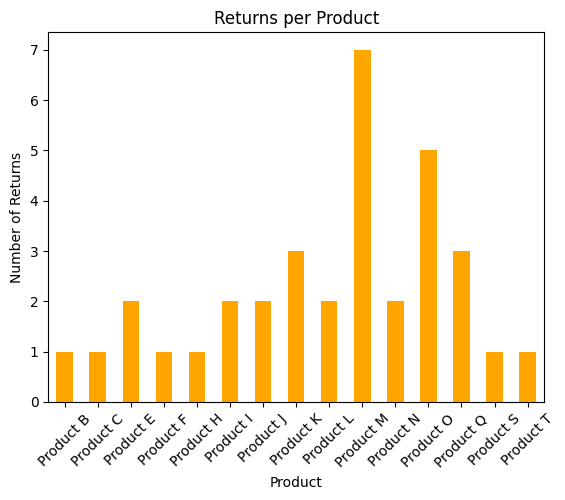

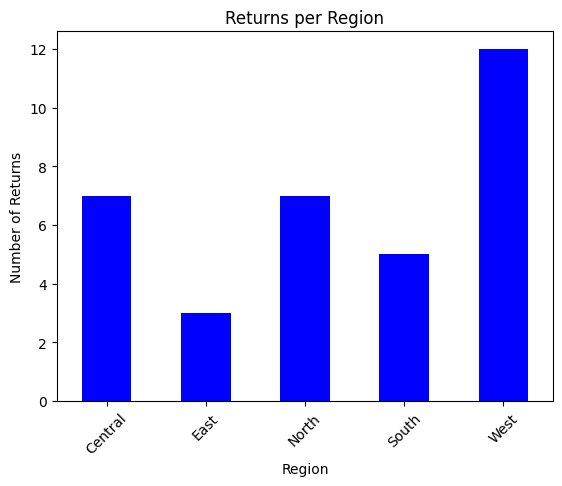

In [0]:
###Customer Analysis
# Count the number of returns per product
returns_per_product = df[df['Returns'] == 1].groupby('ProductName')['Returns'].count()

# Count the number of returns per region
returns_per_region = df[df['Returns'] == 1].groupby('Region')['Returns'].count()

# Visualizing returns per product
returns_per_product.plot(kind='bar', color='orange', title='Returns per Product')
plt.xlabel('Product')
plt.ylabel('Number of Returns')
plt.xticks(rotation=45)
plt.show()

# Visualizing returns per region
returns_per_region.plot(kind='bar', color='blue', title='Returns per Region')
plt.xlabel('Region')
plt.ylabel('Number of Returns')
plt.xticks(rotation=45)
plt.show()


Data Analysis


In [0]:
best_selling_products = df.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(5)
print("Best-selling Products:\n", best_selling_products)


Best-selling Products:
 ProductName
Product L    341
Product C    326
Product M    297
Product B    296
Product O    288
Name: Quantity, dtype: int64


In [0]:
# Ensure 'Date' is a datetime column
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['TotalSale'].sum()
print("Monthly Sales:\n", monthly_sales)


Monthly Sales:
 Month
2023-01    26314.09
2023-02    19481.83
2023-03    26030.28
2023-04    21559.96
2023-05    28958.55
2023-06    18437.98
2023-07    23678.50
2023-08    22420.45
2023-09    22298.22
2023-10    27278.60
2023-11    16339.98
2023-12    26843.36
Freq: M, Name: TotalSale, dtype: float64


In [0]:
average_sale_by_return_status = df.groupby('Returns')['TotalSale'].mean()
print("Average Sale Amount by Return Status:\n", average_sale_by_return_status)


Average Sale Amount by Return Status:
 Returns
0    563.076996
1    507.291765
Name: TotalSale, dtype: float64


In [0]:
channel_efficiency = df.groupby('SalesChannel')['UnitPrice'].mean()
print("Sales Channel Efficiency (Average Unit Price):\n", channel_efficiency)


Sales Channel Efficiency (Average Unit Price):
 SalesChannel
Offline    58.784901
Online     53.993644
Name: UnitPrice, dtype: float64


In [0]:
common_return_reasons = df[df['Returns'] == 1]['ReturnReason'].value_counts()
print("Common Return Reasons:\n", common_return_reasons)


Common Return Reasons:
 Reason Not Provided    30
Damaged                 2
Wrong item              1
Not as described        1
Name: ReturnReason, dtype: int64


In [0]:
loyal_customers = df.groupby('CustomerID').size().sort_values(ascending=False).head(5)
print("Loyal Customers:\n", loyal_customers)


Loyal Customers:
 CustomerID
CUST113    6
CUST065    6
CUST147    6
CUST075    6
CUST152    5
dtype: int64


In [0]:
category_performance = df.groupby('ProductCategory')['TotalSale'].mean().sort_values(ascending=False)
print("Product Category Performance:\n", category_performance)


Product Category Performance:
 ProductCategory
Clothing          659.782500
Home & Kitchen    579.799765
Sports            563.393542
Books             506.517551
Electronics       495.871282
Name: TotalSale, dtype: float64


In [0]:
# Adding a new column for discount impact (TotalSale * DiscountRate)
df['DiscountImpact'] = df['TotalSale'] * df['DiscountRate']
discount_sales_volume_correlation = df[['DiscountImpact', 'Quantity']].corr().iloc[0, 1]
print("Correlation between Discount Impact and Sales Volume:\n", discount_sales_volume_correlation)


Correlation between Discount Impact and Sales Volume:
 0.5173065161597667


In [0]:
average_shipping_cost_by_region = df.groupby('Region')['ShippingCost'].mean()
print("Average Shipping Cost by Region:\n", average_shipping_cost_by_region)


Average Shipping Cost by Region:
 Region
Central    9.043796
East       9.260818
North      9.498913
South      9.177253
West       9.579495
Name: ShippingCost, dtype: float64


In [0]:
# Assuming 'Date' is already converted to datetime and setting it as index
df.set_index('Date', inplace=True)
daily_sales = df['Quantity'].resample('D').sum()
outliers = daily_sales[(daily_sales - daily_sales.mean()).abs() > 3 * daily_sales.std()]
print("Anomalous Sales Days:\n", outliers)


Anomalous Sales Days:
 Date
2023-03-07    65
2023-08-05    65
2023-09-03    58
2023-10-19    55
Name: Quantity, dtype: int64
